In [2]:
import networkx

Загрузим модель:

In [3]:
import gensim

c:\users\никита\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
model_path = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'

In [5]:
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=False)

In [6]:
model.init_sims(replace=True)

Возьмём семантическое поле <i>Наука</i>.

In [27]:
sem_field = ['наука_NOUN','ученый_NOUN','эксперимент_NOUN','гипотеза_NOUN','теория_NOUN','аксиома_NOUN',
            'эмпирический_ADJ','теоретический_ADJ','метод_NOUN','факт_NOUN','критерий_NOUN',
            'закон_NOUN','постулат_NOUN',"университет_NOUN","научный_ADJ","фактический_ADJ",
            "грант_NOUN","конференция_NOUN","исследователь_NOUN","исследование_NOUN","аспирантура_NOUN",
             "докторантура_NOUN","институт_NOUN","исследовательский_ADJ","проект_NOUN","феномен_NOUN","диссертация_NOUN"]

Создадим граф с рёбрами - словами семантического поля:

In [45]:
sem_graph = networkx.Graph()
sem_graph.add_nodes_from(sem_field)

Добавим рёбра между словами, косинусная близость между которыми выше 0.5:

In [46]:
sem_field_copy = [i for i in sem_field[1:]]
edges = []
for word1 in sem_field:
    for word2 in sem_field_copy:
        closure = model.similarity(word1,word2)
        print(word1,word2,closure)
        if closure > 0.5:
            edges.append((word1,word2))
    if sem_field_copy:
        sem_field_copy.pop(0)
sem_graph.add_edges_from(edges)

наука_NOUN ученый_NOUN 0.5809911404030221
наука_NOUN эксперимент_NOUN 0.3530056395785648
наука_NOUN гипотеза_NOUN 0.3890126009674255
наука_NOUN теория_NOUN 0.5167943265735938
наука_NOUN аксиома_NOUN 0.3649866136898107
наука_NOUN эмпирический_ADJ 0.4373506703587028
наука_NOUN теоретический_ADJ 0.5620606103966173
наука_NOUN метод_NOUN 0.3641978405062491
наука_NOUN факт_NOUN 0.3242302036851724
наука_NOUN критерий_NOUN 0.25321399832440933
наука_NOUN закон_NOUN 0.3715564940542534
наука_NOUN постулат_NOUN 0.3496016483749531
наука_NOUN университет_NOUN 0.45718267729801276
наука_NOUN научный_ADJ 0.6245389623936689
наука_NOUN фактический_ADJ 0.26734944876161115
наука_NOUN грант_NOUN 0.2825462569222121
наука_NOUN конференция_NOUN 0.2588640021221642
наука_NOUN исследователь_NOUN 0.41595285749838146
наука_NOUN исследование_NOUN 0.4947619153234712
наука_NOUN аспирантура_NOUN 0.31259686219737226
наука_NOUN докторантура_NOUN 0.43652276844148596
наука_NOUN институт_NOUN 0.42446513731267527
наука_NOUN 

теоретический_ADJ проект_NOUN 0.31368059205687526
теоретический_ADJ феномен_NOUN 0.4061461593030924
теоретический_ADJ диссертация_NOUN 0.4161613571907495
метод_NOUN факт_NOUN 0.331523956097355
метод_NOUN критерий_NOUN 0.4796077454854418
метод_NOUN закон_NOUN 0.3035081367933095
метод_NOUN постулат_NOUN 0.3857573577523911
метод_NOUN университет_NOUN 0.1964076913532965
метод_NOUN научный_ADJ 0.38535103400578474
метод_NOUN фактический_ADJ 0.335045503245547
метод_NOUN грант_NOUN 0.2528328841019374
метод_NOUN конференция_NOUN 0.23509080719034842
метод_NOUN исследователь_NOUN 0.40593706233717997
метод_NOUN исследование_NOUN 0.5084370300829482
метод_NOUN аспирантура_NOUN 0.1699110648850437
метод_NOUN докторантура_NOUN 0.3318403510946898
метод_NOUN институт_NOUN 0.2667368191309015
метод_NOUN исследовательский_ADJ 0.37958396851498827
метод_NOUN проект_NOUN 0.28259504788221623
метод_NOUN феномен_NOUN 0.37846751757292185
метод_NOUN диссертация_NOUN 0.2740484311299676
факт_NOUN критерий_NOUN 0.3947

Посмотрим, какие рёбра есть в сети:

In [47]:
sem_graph.edges()

[('наука_NOUN', 'ученый_NOUN'),
 ('наука_NOUN', 'теория_NOUN'),
 ('наука_NOUN', 'теоретический_ADJ'),
 ('наука_NOUN', 'научный_ADJ'),
 ('ученый_NOUN', 'научный_ADJ'),
 ('ученый_NOUN', 'исследователь_NOUN'),
 ('ученый_NOUN', 'исследование_NOUN'),
 ('ученый_NOUN', 'исследовательский_ADJ'),
 ('эксперимент_NOUN', 'метод_NOUN'),
 ('эксперимент_NOUN', 'исследование_NOUN'),
 ('эксперимент_NOUN', 'исследовательский_ADJ'),
 ('гипотеза_NOUN', 'теория_NOUN'),
 ('гипотеза_NOUN', 'аксиома_NOUN'),
 ('гипотеза_NOUN', 'теоретический_ADJ'),
 ('гипотеза_NOUN', 'факт_NOUN'),
 ('гипотеза_NOUN', 'постулат_NOUN'),
 ('гипотеза_NOUN', 'исследователь_NOUN'),
 ('теория_NOUN', 'аксиома_NOUN'),
 ('теория_NOUN', 'эмпирический_ADJ'),
 ('теория_NOUN', 'теоретический_ADJ'),
 ('теория_NOUN', 'метод_NOUN'),
 ('теория_NOUN', 'постулат_NOUN'),
 ('аксиома_NOUN', 'критерий_NOUN'),
 ('аксиома_NOUN', 'постулат_NOUN'),
 ('эмпирический_ADJ', 'теоретический_ADJ'),
 ('эмпирический_ADJ', 'критерий_NOUN'),
 ('эмпирический_ADJ', 'п

Также выведем графическое представление сети:

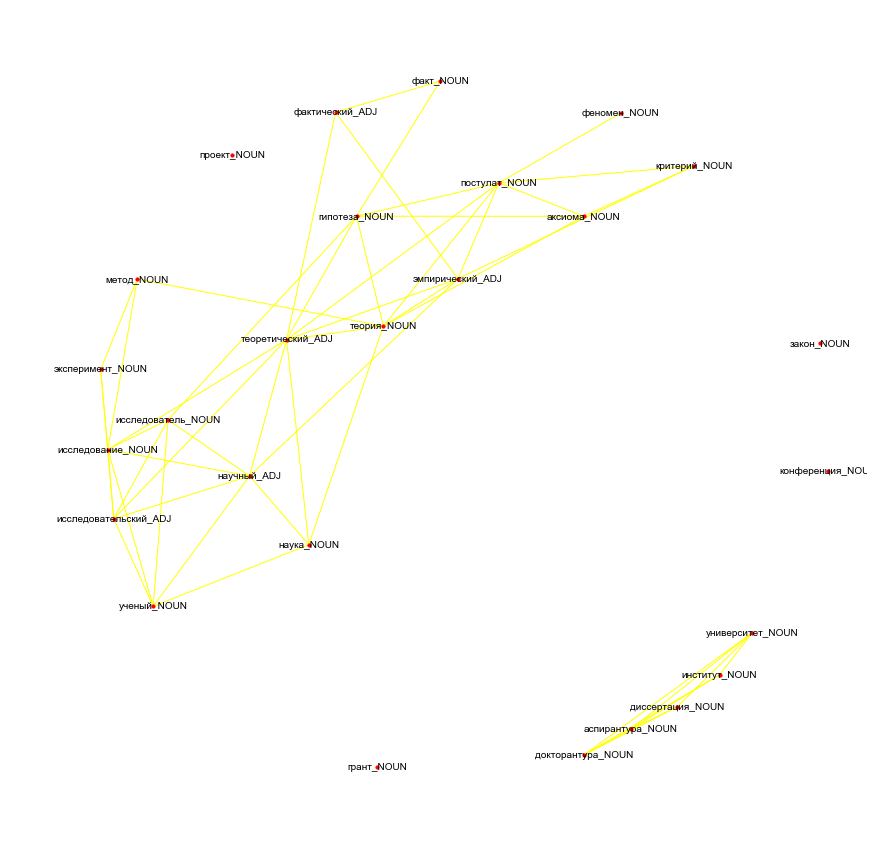

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
pos = networkx.spring_layout(sem_graph)
networkx.draw_networkx_nodes(sem_graph, pos, node_color='red', node_size=10) 
networkx.draw_networkx_edges(sem_graph, pos, edge_color='yellow')
networkx.draw_networkx_labels(sem_graph, pos, font_size=10, font_family='Arial')
plt.axis('off') 
plt.show()

Можно заметить, что на графе выделяются две компоненты связности - одна, содержащая слова, связанные с методологией науки и другая - связанная с огранизационной структурой научных учреждений и системой высшего образования.

Найдём центральные слова графа, рассчитав для каждого слова степень централизации:

In [49]:
deg = networkx.degree_centrality(sem_graph)
for i in sorted(deg, key = lambda x: deg[x], reverse = True):
    print(i,deg[i])

теоретический_ADJ 0.34615384615384615
теория_NOUN 0.2692307692307693
постулат_NOUN 0.2692307692307693
научный_ADJ 0.2692307692307693
исследование_NOUN 0.2692307692307693
гипотеза_NOUN 0.23076923076923078
эмпирический_ADJ 0.23076923076923078
исследовательский_ADJ 0.23076923076923078
ученый_NOUN 0.19230769230769232
исследователь_NOUN 0.19230769230769232
наука_NOUN 0.15384615384615385
аксиома_NOUN 0.15384615384615385
университет_NOUN 0.15384615384615385
аспирантура_NOUN 0.15384615384615385
докторантура_NOUN 0.15384615384615385
эксперимент_NOUN 0.11538461538461539
метод_NOUN 0.11538461538461539
критерий_NOUN 0.11538461538461539
фактический_ADJ 0.11538461538461539
институт_NOUN 0.11538461538461539
диссертация_NOUN 0.11538461538461539
факт_NOUN 0.07692307692307693
феномен_NOUN 0.038461538461538464
закон_NOUN 0.0
грант_NOUN 0.0
конференция_NOUN 0.0
проект_NOUN 0.0


Вычленим из графа компоненты связности:

In [50]:
connected_components = [i for i in networkx.connected_component_subgraphs(sem_graph) if len(i.nodes())>1]

Сколько их получилось?

In [51]:
len(connected_components)

2

Найдём для каждой компоненты связности радиус и средний коэффициент кластеризации:

In [52]:
print('Радиус',"Средний коэффициент кластеризации", sep='\t')
for component in connected_components:
    print(networkx.radius(component), networkx.average_clustering(component),sep='\t')

Радиус	Средний коэффициент кластеризации
2	0.44126984126984126
1	0.9
